In [2]:
%pylab inline
#import numpy as np
import pandas as pd
#import matplotlib
#import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import random
from astropy.time import Time
from scipy import stats
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.interpolate import interp1d
def inverse_transform_sampling(data,n_bins=50,n_samples=1000,weights=None):
    pdf,bedges = np.histogram(data,bins=n_bins,density=True,weights=weights)
    cdf = np.zeros(bedges.shape)
    cdf[1:] = np.cumsum(pdf*np.diff(bedges)) #integrate
    inv_cdf = interp1d(cdf,bedges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

In [4]:
# 1 year of data
df1 = pd.read_csv('ic-singlet-jan16.csv')
print len(df1)

16656


In [5]:
df1.head(5)

,ICDec,ICRA,ICsigmaR,ICtime,ICmsec
0,-34.7199,205.1050,0.196344,2016-01-01 00:04:57,98664
1,54.3056,107.9430,0.534230,2016-01-01 00:05:40,122278
2,57.3919,108.1390,1.176690,2016-01-01 00:05:48,730722
3,-32.6259,332.9440,0.175290,2016-01-01 00:06:08,981306
4,22.6634,20.1443,2.750110,2016-01-01 00:15:24,288569


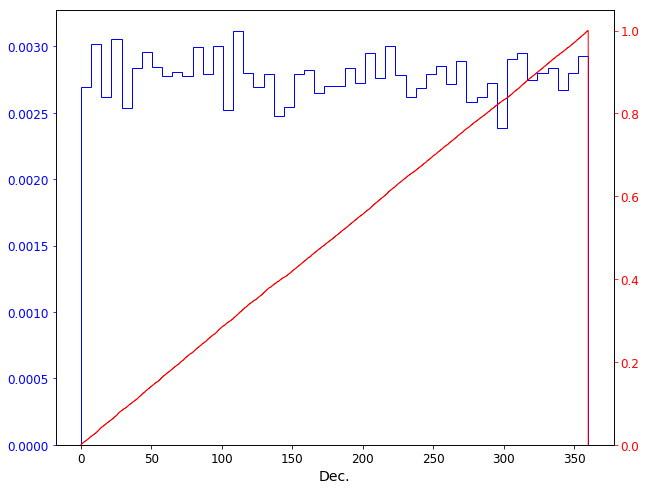

In [6]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12
fig, ax1 = plt.subplots()
l=ax1.hist(df1.ICRA,bins=50,histtype='step',normed=True,color='blue')
ax1.set_xlabel('Dec.',size=14)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
d=ax2.hist(df1.ICRA,bins=1000,histtype='step',normed=True,cumulative=True,color='red')
ax2.tick_params('y', colors='r')

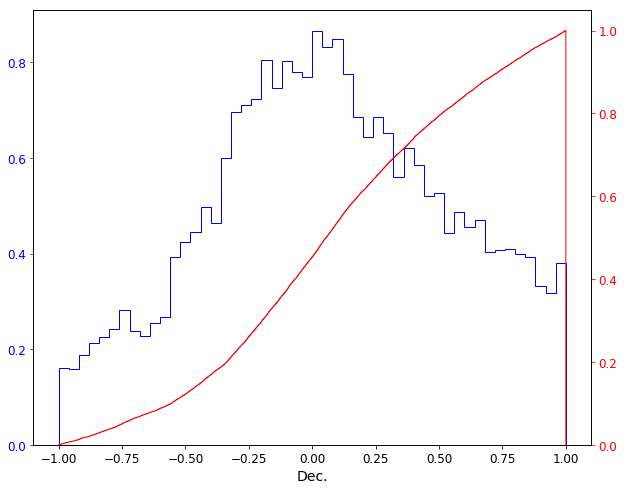

In [7]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12
fig, ax1 = plt.subplots()
#l=ax1.hist(df1.ICDec,bins=50,histtype='step',normed=True,color='blue',weights=1./np.cos(np.deg2rad(df1.ICDec)))
l=ax1.hist(np.sin(np.deg2rad(df1.ICDec)),bins=50,histtype='step',normed=True,color='blue')#,weights=1./np.cos(np.deg2rad(df1.ICDec)))
ax1.set_xlabel('Dec.',size=14)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
#d=ax2.hist(df1.ICDec,bins=1000,histtype='step',normed=True,cumulative=True,color='red',weights=1./np.cos(np.deg2rad(df1.ICDec)))
d=ax2.hist(np.sin(np.deg2rad(df1.ICDec)),bins=1000,histtype='step',normed=True,cumulative=True,color='red')#,weights=1./np.cos(np.deg2rad(df1.ICDec)))
ax2.tick_params('y', colors='r')

In [16]:
# scramble IceCube data
for i in range(1):
    df2 = df.reindex(np.random.permutation(df.index))
    df2.reset_index(drop=True, inplace=True)
    df2[['ICDec','ICsigmaR']] = df[['ICDec','ICsigmaR']]
    df2.columns=['ICDec','ICRA','ICsigmaR','ICtime','ICmsec']
    df2.to_csv("IC-Jan16-energy-scrambled{}.csv".format(i),index=False,encoding='utf-8')

In [8]:
df2.head(5)

NameError: name 'df2' is not defined

In [18]:
#file with no energy
for i in range(1000,1001):
    df2 = df.reindex(np.random.permutation(df.index))
    df2.reset_index(drop=True, inplace=True)
    df2[['ICDec','ICsigmaR']] = df[['ICDec','ICsigmaR']]
    df2.columns=['ICDec','ICRA','ICsigmaR','ICtime','ICmsec']
    df2.to_csv("IC_scrambled/{}.csv".format(i),
          index=False,encoding='utf-8')

In [20]:
#Scrambling HAWC
df=pd.read_csv("hawc_data_2.csv",delimiter=",")
df['HTime_c']=pd.to_datetime(df['HTime_c'])
df = df.sort_values(by='HTime_c')

In [21]:
df.head(5)

,HDec,HRA,HsigmaR,HTime_i,HTime_c,HTime_f,Hduration,Hsig
1,-8.423330,256.377,0.75,2016-01-01 14:03:17,2016-01-01 16:52:28,2016-01-01 19:41:39,5.63943,2.85261
27,-19.431800,258.047,0.75,2016-01-01 14:49:10,2016-01-01 16:59:13,2016-01-01 19:09:16,4.33481,3.08562
14,-12.673900,258.487,0.75,2016-01-01 14:24:19,2016-01-01 17:00:55,2016-01-01 19:37:31,5.22007,2.95240
7,-8.159460,258.882,0.75,2016-01-01 14:12:34,2016-01-01 17:02:28,2016-01-01 19:52:22,5.66324,3.24719
3,-0.708832,261.123,0.75,2016-01-01 14:04:34,2016-01-01 17:11:22,2016-01-01 20:18:10,6.22688,3.03762


In [23]:
len(df.Hsig)

16836

In [21]:
for i in range(0,1200):
    df2 = df.reindex(np.random.permutation(df.index))
    df2.reset_index(drop=True, inplace=True)
    df2[['HDec','Hduration']] = df[['HDec','Hduration']]
    df2[['HTime_i']] = pd.to_datetime(df2.HTime_c)-pd.to_timedelta(df2.Hduration/2, unit='h')
    df2[['HTime_f']] = pd.to_datetime(df2.HTime_c)+pd.to_timedelta(df2.Hduration/2, unit='h')
    df2.columns=['HDec','HRA','HsigmaR','HTime_i','HTime_c','HTime_f','Hduration','Hsig']
    df2.to_csv("HAWC_scrambled/{}.csv".format(i),
          index=False,encoding='utf-8')

## New IC data with FPRD and Sigs

In [24]:
data = np.load('2015singlets_data_burn_3339043sec_forHAWCcoincs.npz')
data.files

['cr_err', 'sigs', 'ra', 'dec', 'fprd', 'mjds']

In [25]:
values = []
names = ['ICsigmaR','ICsigs','ICRA','ICDec','ICFPRD','ICtime','ICmsec']
for item in data.iteritems():
    values.append(item[1])

In [26]:
values=np.asarray(values).T.tolist()

In [27]:
for item in values:
    t = Time(stats.uniform.rvs(loc=57388.0,scale=38.6,size=1)[0],format='mjd')
    t.format = 'iso'
    item[5] = t.value[0:19]
    item.append(t.value[20:])

In [28]:
df = pd.DataFrame.from_records(values,columns=names)

In [29]:
df['ICRA'] = np.rad2deg(df['ICRA'])
df['ICDec'] = np.rad2deg(df['ICDec'])
df['ICsigmaR'] = np.rad2deg(df['ICsigmaR'])

In [30]:
df.columns = ['ICsigmaR','ICsigs','ICRA','ICDec','ICFPRD','ICtime','ICmsec']# ['ICDec','ICRA','ICsigmaR','ICtime','ICmsec','ICFPRD','ICsigs']
df = df[['ICDec','ICRA','ICsigmaR','ICtime','ICmsec','ICFPRD','ICsigs']]
print len(df)


22334


In [35]:
for i in range(0,1200):
    df2 = df.reindex(np.random.permutation(df.index))
    df2.reset_index(drop=True, inplace=True)
    df2[['ICDec','ICsigmaR']] = df[['ICDec','ICsigmaR']]
    df2.columns=['ICDec','ICRA','ICsigmaR','ICtime','ICmsec','ICFPRD','ICsigs']
    df2.to_csv("IC_scrambled2/{}.csv".format(i),
          index=False,encoding='utf-8')

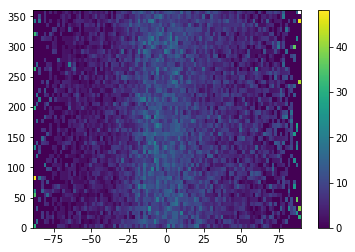

In [10]:
hist2d(df.ICDec,df.ICRA,bins=[100,50],weights=(1./np.cos(np.deg2rad(df.ICDec))),cmax=50)
colorbar()

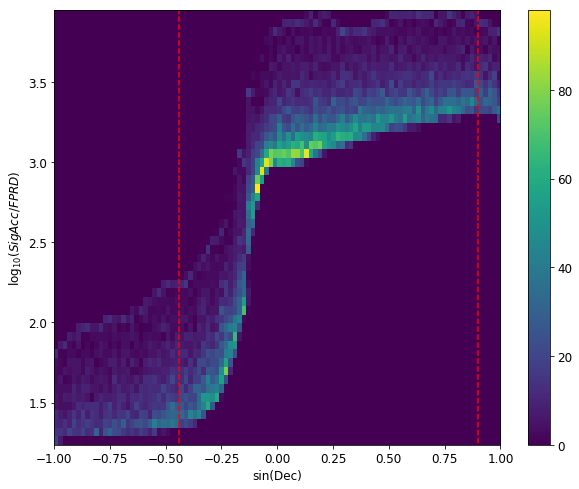

In [18]:
hist2d(np.sin(np.deg2rad(df.ICDec)),np.log10(df.ICsigs/df.ICFPRD),bins=[100,50])
colorbar()
vlines(np.sin(np.deg2rad(-26)),1.0,4.0,linestyles='--',color='red')
vlines(np.sin(np.deg2rad(64)),1.0,4.0,linestyles='--',color='red')
xlabel("sin(Dec)")
ylabel(r"$\log_{10} (SigAcc/FPRD)$")

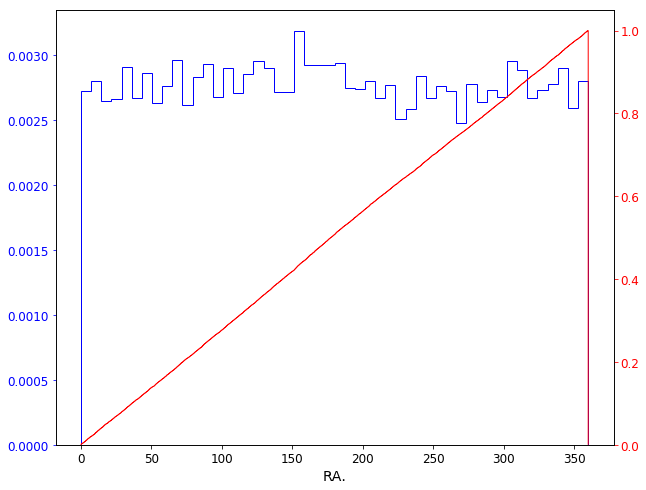

In [11]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12
fig, ax1 = plt.subplots()
l=ax1.hist(df.ICRA,bins=50,histtype='step',normed=True,color='blue')
ax1.set_xlabel('RA.',size=14)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
d=ax2.hist(df.ICRA,bins=1000,histtype='step',normed=True,cumulative=True,color='red')
ax2.tick_params('y', colors='r')

[   0.93672699   -6.48460709   62.30147225  132.84597729]


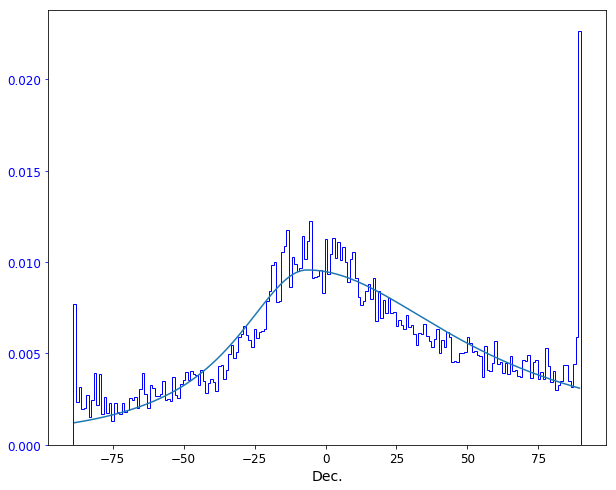

In [17]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12

def func(x,a,x0,sigma1,sigma2):
    y = a*exp(-(x-x0)**2/(2*sigma1**2))/sqrt(2*np.pi*sigma1**2)*((x-x0)<0)
    y+= (a*sigma2/sigma1)*exp(-(x-x0)**2/(2*sigma2**2))/sqrt(2*np.pi*sigma2**2)*((x-x0)>0)
    return y
p0 = [0.006,0.0, 40.,40.]

def cauchy(x,a,x0,g1,g2):
    y = a*(1/np.pi) * ((g1/2)/((x-x0)**2 + (g1**2/4))) * ((x-x0)<0)
    y+= (a*g2/g1)*((1/np.pi) * ((g2/2)/((x-x0)**2 + (g2**2/4))) ) * ((x-x0)>=0)
    return y
p1 = [0.1,0.,2.,2.] 

def FloorGauss(x,a,x0,sigma):
    y = a+exp(-(x-x0)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
    return y
p2 = [0.002,0.0,40.]


fig, ax1 = plt.subplots()
n,b,p=ax1.hist(df.ICDec,bins=200,histtype='step',normed=True,color='blue',weights=1./np.cos(np.deg2rad(df.ICDec)))
ax1.set_xlabel('Dec.',size=14)
ax1.tick_params('y', colors='b')

bcenters = b[:-1] + 0.5 * (b[1:] - b[:-1])
popt, pcov = curve_fit(func,bcenters,n,p0)
popt2,pcov2 = curve_fit(cauchy,bcenters,n,p1)
#ax1.plot(bcenters, func(bcenters,*popt))
ax1.plot(bcenters, cauchy(bcenters,*popt2))

print popt2

#ax2 = ax1.twinx()
#d=ax2.hist(df.ICDec,bins=1000,histtype='step',normed=True,cumulative=True,color='red',weights=1./np.cos(np.deg2rad(df.ICDec)))
#ax2.tick_params('y', colors='r')

(0.9772522234469897, 8.150163466215152e-10)


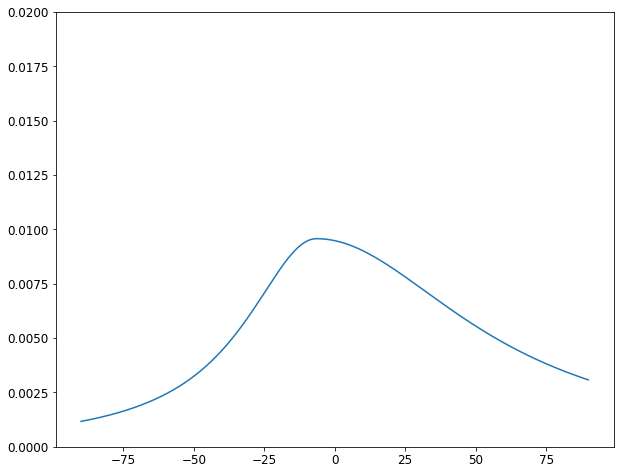

In [18]:
import scipy.integrate as integrate

def cauchy(x):
    a=0.9367
    x0=-6.4846
    g1 = 62.3014
    g2 = 132.8459
    y = a*(1/np.pi) * ((g1/2)/((x-x0)**2 + (g1**2/4))) * ((x-x0)<0)
    y+= (a*g2/g1)*((1/np.pi) * ((g2/2)/((x-x0)**2 + (g2**2/4))) ) * ((x-x0)>=0)
    return y
x=linspace(-90,90,1000)
plot(x,cauchy(x))
ylim(0,0.02)

A = integrate.quad(cauchy,-90,90)
print A


[ 1.03559549 -0.11764551  0.81984255  1.65522784]


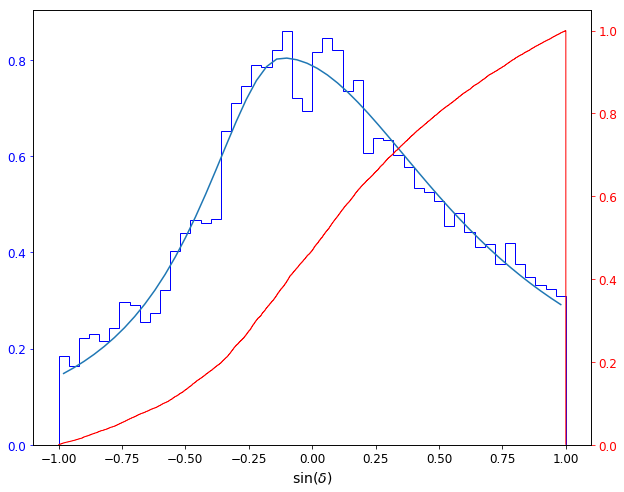

In [32]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12

def cauchy(x,a,x0,g1,g2):
    y = a*(1/np.pi) * ((g1/2)/((x-x0)**2 + (g1**2/4))) * ((x-x0)<0)
    y+= (a*g2/g1)*((1/np.pi) * ((g2/2)/((x-x0)**2 + (g2**2/4))) ) * ((x-x0)>=0)
    return y
p1 = [0.7,0.,0.5,0.5] 

fig, ax1 = plt.subplots()
n,b,p=ax1.hist(np.sin(np.deg2rad(df.ICDec)),bins=50,histtype='step',normed=True,color='blue')#,weights=1./np.cos(np.deg2rad(df.ICDec)))
ax1.set_xlabel(r'sin($\delta$)',size=14)
ax1.tick_params('y', colors='b')

bcenters = b[:-1] + 0.5 * (b[1:] - b[:-1])
popt, pcov = curve_fit(func,bcenters,n,p0)
popt2,pcov2 = curve_fit(cauchy,bcenters,n,p1)
ax1.plot(bcenters, cauchy(bcenters,*popt2))
print popt2

ax2 = ax1.twinx()
d=ax2.hist(np.sin(np.deg2rad(df.ICDec)),bins=1000,histtype='step',normed=True,cumulative=True,color='red')#,weights=1./np.cos(np.deg2rad(df.ICDec)))
ax2.tick_params('y', colors='r')

(0.995644318388513, 1.5342625579598093e-11)


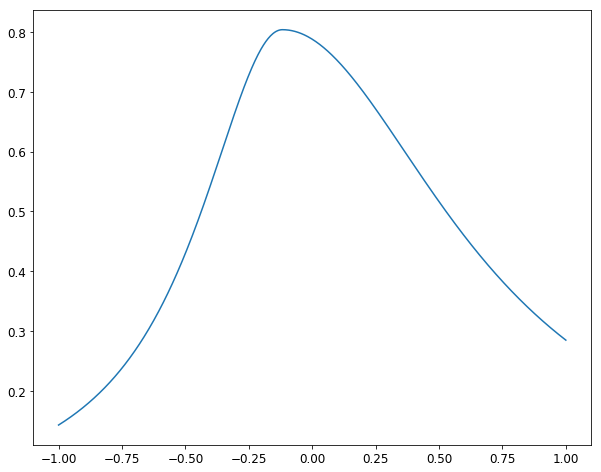

In [127]:
import scipy.integrate as integrate

def cauchy(x):
    #x=np.sin(np.deg2rad(x))
    a=1.035595
    x0=-0.117645
    g1 = 0.81984
    g2 = 1.655227
    y = a*(1/np.pi) * ((g1/2)/((x-x0)**2 + (g1**2/4))) * ((x-x0)<0)
    y+= (a*g2/g1)*((1/np.pi) * ((g2/2)/((x-x0)**2 + (g2**2/4))) ) * ((x-x0)>=0)
    return y
x=linspace(-90,90.,1000)
plot(np.sin(np.deg2rad(x)),cauchy(np.sin(np.deg2rad(x))))
#ylim(0,0.02)

A = integrate.quad(cauchy,np.sin(np.deg2rad(-90.)),np.sin(np.deg2rad(90.)))
print A


In [125]:
cauchy(np.sin(np.deg2rad(-90.)))

0.14275116976322294

## SigAcc/FPRD

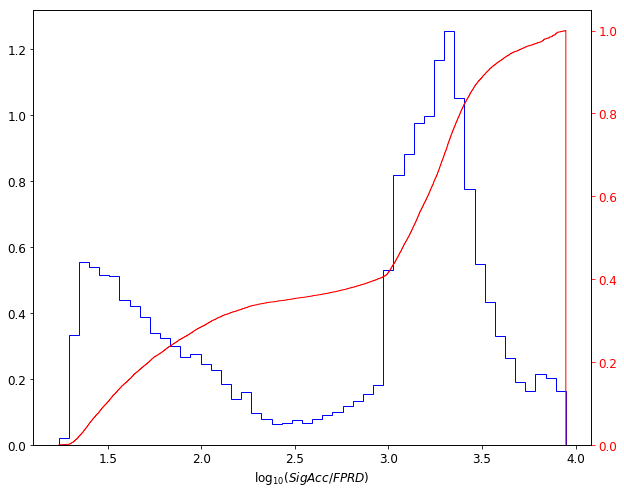

In [19]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12
fig, ax1 = plt.subplots()
l=ax1.hist(np.log10(df.ICsigs/df.ICFPRD),bins=50,histtype='step',normed=True,color='blue')
#yscale('log')
ax1.set_xlabel(r'$\log_{10} (SigAcc/FPRD)$')

ax2 = ax1.twinx()
n,b,p=ax2.hist(np.log10(df.ICsigs/df.ICFPRD),bins=1000,histtype='step',normed=True,cumulative=True,color='red')#,weights=1./np.cos(np.deg2rad(df.ICDec)))
ax2.tick_params('y', colors='r')
n=np.asarray(n)
b=np.asarray(b)
np.savez("CDF_SAF.npz",x=b,y=n)


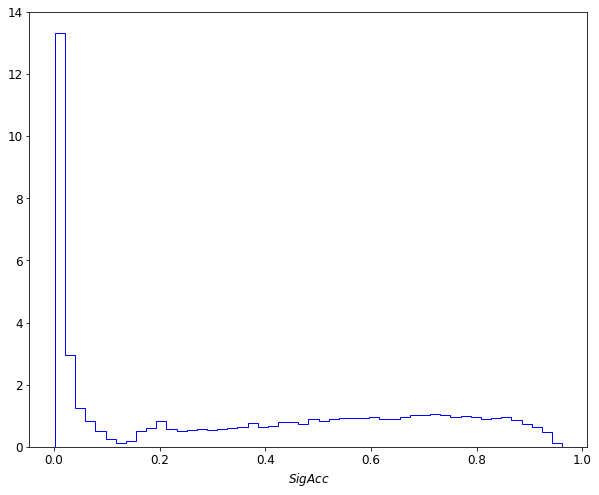

In [30]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12
fig, ax1 = plt.subplots()
l=ax1.hist(df.ICsigs,bins=50,histtype='step',normed=True,color='blue')
#yscale('log')
ax1.set_xlabel(r'$SigAcc$')

In [21]:
min(df.ICsigs/df.ICFPRD)

17.287055750448154

In [22]:
max(df.ICsigs/df.ICFPRD)

8875.3378718365675

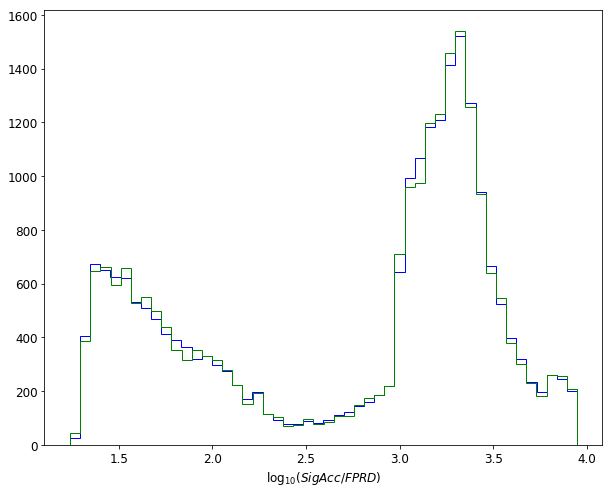

In [23]:
rcParams['figure.figsize']=10,8
rcParams['font.size']=12
fig, ax1 = plt.subplots()
l=ax1.hist(np.log10(df.ICsigs/df.ICFPRD),bins=50,histtype='step',normed=False,color='blue')
new = inverse_transform_sampling(np.log10(df.ICsigs/df.ICFPRD),n_samples=22334)
ax1.hist(new,bins=50,histtype='step',color = 'green')
#yscale('log')
ax1.set_xlabel(r'$\log_{10} (SigAcc/FPRD)$')